<a href="https://colab.research.google.com/github/rashida048/ApacheSpark-BigDataAnalytics/blob/main/neural_network_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.4 MB 63 kB/s 
     |████████████████████████████████| 198 kB 55.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=011066109e43384213c9d4697fca0921712c68a5e030b9c0f52da9ff4b55fa24
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [ ]:
data = sc.textFile("fashion_mnist_train.csv")
header = data.first() 
data = data.filter(lambda row: row != header) 

In [ ]:
data_rd = data.map(lambda x: list(map(int, x.split(","))))

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_der(x):
  s = sigmoid(x)
  return s*(1-s)

def cost_sse(y_pred, y):
  return 0.5 * np.sum(np.power(y_pred - y, 2))

def forward(x, w, b):
  return np.dot(x, w) + b

def predict(x, w1, b1, w2, b2):
  return sigmoid(forward(sigmoid(forward(x, w1, b1)), w2, b2)) 

In [ ]:
def y_trans(y):
  y2 = np.zeros(10)
  y2[y] = 1
  return y2

In [ ]:
lr = 0.1
input_layer = 784
hidden_layer = 150
output_layer = 10

import numpy as np
w1 = np.random.rand(input_layer, hidden_layer) - 0.5 # Shape (784, 150)
w2 = np.random.rand(hidden_layer, output_layer) - 0.5 # Shape (150, 10)
b1 = np.random.rand(1, hidden_layer) - 0.5 # Shape (1, 64)
b2 = np.random.rand(1, output_layer) - 0.5
cost_list = []
acc_list = []
w1_list=[]
w2_list = []
b1_list = []
b2_list = []

In [ ]:
for i in range(500):
  sample = data_rd.sample(False, 0.05)
  grad2 = sample.map(lambda x: (x[0], forward(x[1:], w1, b1), x[1:]))\
        .map(lambda x: (x[0], x[1], sigmoid(x[1]), x[2]))\
        .map(lambda x: (x[0], x[1], x[2], forward(x[2], w2, b2), x[3]))\
        .map(lambda x: (x[0], x[1], x[2], sigmoid(x[3]), x[4]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[3] - y_trans(x[0]), x[4]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[4], np.dot(x[4], w2.T)*x[2]*(1-x[2]), x[5]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[4], x[5], np.dot(np.array([x[6]]).T, x[5]), x[6]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[4], x[5], x[6], np.dot(np.array(x[2]).T, x[4]), x[7]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], np.dot(x[4], w2.T)*sigmoid_der(x[1]), x[8]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], (x[3] - y_trans(x[0])*x[3]*(1-x[3])), 
                        x[9],1, int(x[0] == np.argmax(x[3])), cost_sse(np.argmax(x[3]), x[0])))\
        .reduce(lambda x, y: (x[0] + y[0], x[1] + y[1], x[2] + y[2], x[3] + y[3], x[4] 
                             + y[4], x[5] + y[5], x[6] + y[6], x[7] + y[7], x[8]+y[8], x[9]+y[9], x[10]+y[10], x[11]+y[11], x[12]+y[12], x[13]+y[13]))
  n = grad2[-3]
  cost = grad2[-1]/n
  print(cost)
  acc = grad2[-2]/n
  cost_list.append(cost)
  acc_list.append(acc)
  dw1 = grad2[6]/n
  dw2 = grad2[7]/n
  db1 = grad2[8]/n
  db2 = grad2[9]/n 

  w1_list.append(w1)
  w2_list.append(w2)
  b1_list.append(b1)
  b2_list.append(b2)

  w1 -= lr*dw1
  w2 -= lr*dw2
  b1 -= lr*db1
  b2 -= lr*db2

12.531207598371777
9.9725935828877
8.767973856209151
7.524484536082475
6.417901234567902
5.903366583541147
5.787371134020619
5.170980926430517
4.94489247311828
4.245394736842106
4.278933680104031
3.874680306905371
4.323785803237858
3.8171974522292995
3.7029262086513994
3.477383863080685
3.387203166226913
3.333798882681564
3.043781725888325
3.358377659574468
2.666448230668414
2.8344072164948453
3.056056701030928
2.8292367399741267
2.6914618369987062
2.6351515151515152
2.760248447204969
2.34367396593674
2.8962395543175488
2.687807881773399
2.4783715012722647
2.272727272727273
2.3542780748663104
2.368146214099217
2.4045751633986927
2.2092391304347827
2.159560723514212
2.592503022974607
2.4818548387096775
2.2163522012578616
2.365284974093264
2.398051948051948
2.2070572569906792
2.3900753768844223
1.8485237483953787
2.128991060025543
2.4102402022756007
2.129911280101394
2.129268292682927
1.7457627118644068
1.9734513274336283
1.975292587776333
2.2390272835112692
2.095179233621755
1.990397805

In [ ]:
test_data = sc.textFile("fashion_mnist_test.csv")
header = test_data.first() 
test = test_data.filter(lambda row: row != header) 

In [ ]:
test.take(2)

['0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,88,99,122,123,80,0,0,0,0,1,1,1,0,0,0,0,0,0,1,2,0,0,0,3,46,174,249,67,0,94,210,61,14,212,157,37,0,0,0,0,1,0,0,0,0,0,2,2,0,23,168,206,242,239,238,214,125,61,113,74,133,236,238,236,203,184,20,0,1,0,0,0,0,0,1,0,0,175,245,223,207,205,206,216,255,237,251,232,223,212,200,205,216,249,173,0,0,2,0,0,0,0,7,0,53,225,201,197,200,201,206,199,197,185,194,204,232,226,249,219,194,205,229,33,0,1,0,0,0,0,1,0,133,223,208,192,195,233,226,216,191,210,188,236,186,0,50,234,207,208,231,133,0,0,0,0,0,0,0,0,216,218,216,194,229,172,64,219,201,200,200,247,68,72,54,165,237,212,219,226,0,0,0,0,0,0,0,50,221,207,220,211,207,165,138,205,192,191,190,232,119,113,67,173,237,217,208,221,29,0,0,0,0,0,0,131,216,200,219,207,212,231,226,193,214,224,206,203,230,122,112,234,224,214,204,224,123,0,0,0,0,0,0,195,212,204,211,203,205,200,184,213,162,138,193,207,203,231,245,208,220,211,203,219,179,0,0,0,0,0,8,185,191,218,233,219,201,221,213,246,11

In [ ]:
test_rd = test.map(lambda x: list(map(int, x.split(","))))

In [ ]:
test_pred = test_rd.map(lambda x: (x[0], predict(x[1:], w1_list[-1], b1_list[-1], w2_list[-1], b2_list[-1])))\
            .map(lambda x: (1, int(x[0] == np.argmax(x[1]))))\
            .reduce(lambda x, y: (x[0] + y[0], x[1]+y[1]))

In [ ]:
test_pred[1]/test_pred[0]

0.756

In [ ]:
max_ind = np.argmax(acc_list)

In [ ]:
test_pred1 = test_rd.map(lambda x: (x[0], predict(x[1:], w1_list[max_ind], b1_list[max_ind], w2_list[max_ind], b2_list[max_ind])))\
            .map(lambda x: (1, int(x[0] == np.argmax(x[1]))))\
            .reduce(lambda x, y: (x[0] + y[0], x[1]+y[1]))

In [ ]:
accuracy = test_pred1[1]/test_pred1[0]

In [ ]:
accuracy

0.756

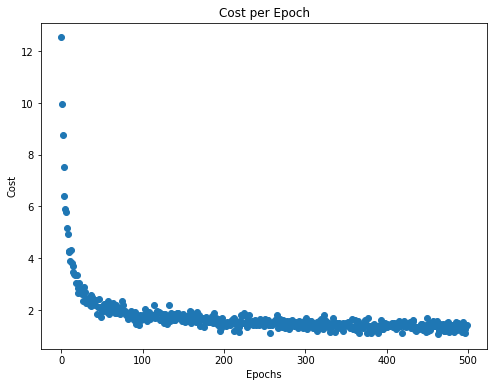

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(list(range(500)), cost_list)
plt.title("Cost per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

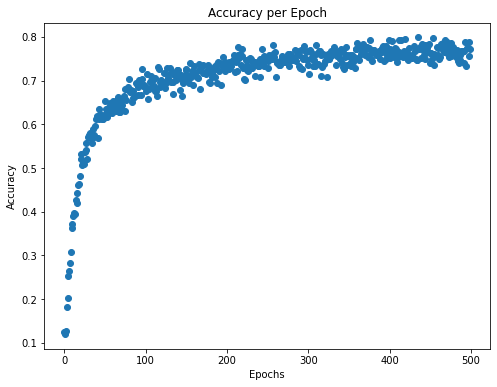

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(list(range(500)), acc_list)
plt.title("Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
lr = 0.1
input_layer = 784
hidden_layer = 150
output_layer = 10

import numpy as np
w1 = np.random.rand(input_layer, hidden_layer) - 0.5 # Shape (784, 150)
w2 = np.random.rand(hidden_layer, output_layer) - 0.5 # Shape (150, 10)
b1 = np.random.rand(1, hidden_layer) - 0.5 # Shape (1, 64)
b2 = np.random.rand(1, output_layer) - 0.5
cost_list = []
acc_list = []
w1_list=[]
w2_list = []
b1_list = []
b2_list = []

In [ ]:
for i in range(300):
  sample = data_rd.sample(False, 0.05)
  grad2 = sample.map(lambda x: (x[0], forward(x[1:], w1, b1), x[1:]))\
        .map(lambda x: (x[0], x[1], sigmoid(x[1]), x[2]))\
        .map(lambda x: (x[0], x[1], x[2], forward(x[2], w2, b2), x[3]))\
        .map(lambda x: (x[0], x[1], x[2], sigmoid(x[3]), x[4]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[3] - y_trans(x[0]), x[4]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[4], np.dot(x[4], w2.T)*x[2]*(1-x[2]), x[5]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[4], x[5], np.dot(np.array([x[6]]).T, x[5]), x[6]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[4], x[5], x[6], np.dot(np.array(x[2]).T, x[4]), x[7]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], np.dot(x[4], w2.T)*sigmoid_der(x[1]), x[8]))\
        .map(lambda x: (x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], (x[3] - y_trans(x[0])*x[3]*(1-x[3])), 
                        x[9],1, int(x[0] == np.argmax(x[3])), cost_sse(np.argmax(x[3]), x[0])))\
        .reduce(lambda x, y: (x[0] + y[0], x[1] + y[1], x[2] + y[2], x[3] + y[3], x[4] 
                             + y[4], x[5] + y[5], x[6] + y[6], x[7] + y[7], x[8]+y[8], x[9]+y[9], x[10]+y[10], x[11]+y[11], x[12]+y[12], x[13]+y[13]))
  n = grad2[-3]
  cost = grad2[-1]/n
  print(cost)
  acc = grad2[-2]/n
  cost_list.append(cost)
  acc_list.append(acc)
  dw1 = grad2[6]/n
  dw2 = grad2[7]/n
  db1 = grad2[8]/n
  db2 = grad2[9]/n 

  w1_list.append(w1)
  w2_list.append(w2)
  b1_list.append(b1)
  b2_list.append(b2)

  w1 -= lr*dw1
  w2 -= lr*dw2
  b1 -= lr*db1
  b2 -= lr*db2

7.732634338138925
8.818066157760814
7.417590027700831
6.337926509186352
6.112452350698857
5.307643312101911
4.865079365079365
5.005018820577164
4.257105943152455
4.240909090909091
3.9851551956815117
3.8131944444444446
3.8420731707317075
3.5802781289506953
3.622422680412371
3.1126666666666667
3.4429086538461537
3.331151832460733
3.012150668286756
2.93782722513089
3.0173053152039553
3.2283163265306123
3.1307397959183674
3.1708278580814717
2.8177150192554556
2.622292993630573
2.642857142857143
2.58160621761658
2.32
3.1057441253263707
2.4215817694369974
2.3939774153074027
2.4621951219512197
2.599476439790576
2.5058823529411764
2.373300370828183
1.923412204234122
2.2156084656084656
2.2449874686716793
2.491206030150754
2.0503778337531484
2.121192893401015
2.264591439688716
1.8717472118959109
2.5320197044334973
1.8936170212765957
2.222520107238606
2.1710858585858586
2.3302919708029197
2.461178045515395
2.17984693877551
2.034749034749035
2.002724795640327
2.2506720430107525
2.147093712930012
1

In [ ]:
test_pred = test_rd.map(lambda x: (x[0], predict(x[1:], w1_list[-1], b1_list[-1], w2_list[-1], b2_list[-1])))\
            .map(lambda x: (1, int(x[0] == np.argmax(x[1]))))\
            .reduce(lambda x, y: (x[0] + y[0], x[1]+y[1]))

In [ ]:
test_pred[1]/test_pred[0]

0.7533

In [ ]:
max_ind = np.argmax(acc_list)

In [ ]:
test_pred1 = test_rd.map(lambda x: (x[0], predict(x[1:], w1_list[max_ind], b1_list[max_ind], w2_list[max_ind], b2_list[max_ind])))\
            .map(lambda x: (1, int(x[0] == np.argmax(x[1]))))\
            .reduce(lambda x, y: (x[0] + y[0], x[1]+y[1]))

In [ ]:
accuracy = test_pred1[1]/test_pred1[0]

In [ ]:
accuracy

0.7533

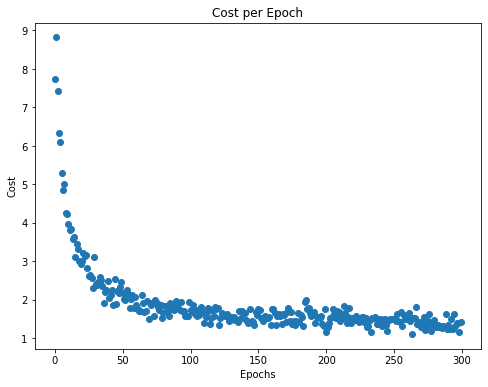

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(list(range(300)), cost_list)
plt.title("Cost per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

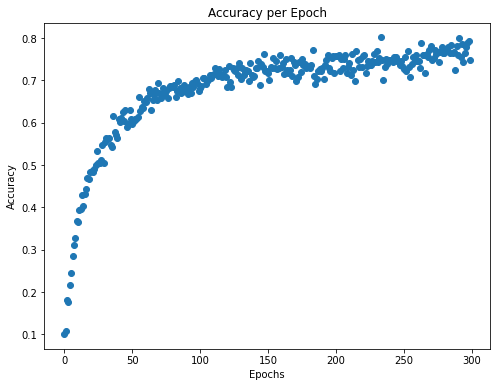

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(list(range(300)), acc_list)
plt.title("Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()